In [2]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from datetime import datetime,timedelta
from classes import Portfolio
import matplotlib.pyplot as plt
from asset_database import DICT_ASSET_INFO
from tools import get_value
from anbima_token import ANBIMA_TOKEN,credentials
from historico_tesouro.tresury_history import DICT_TRESURY_HISTORY

current_path = Path.cwd()

1262.49

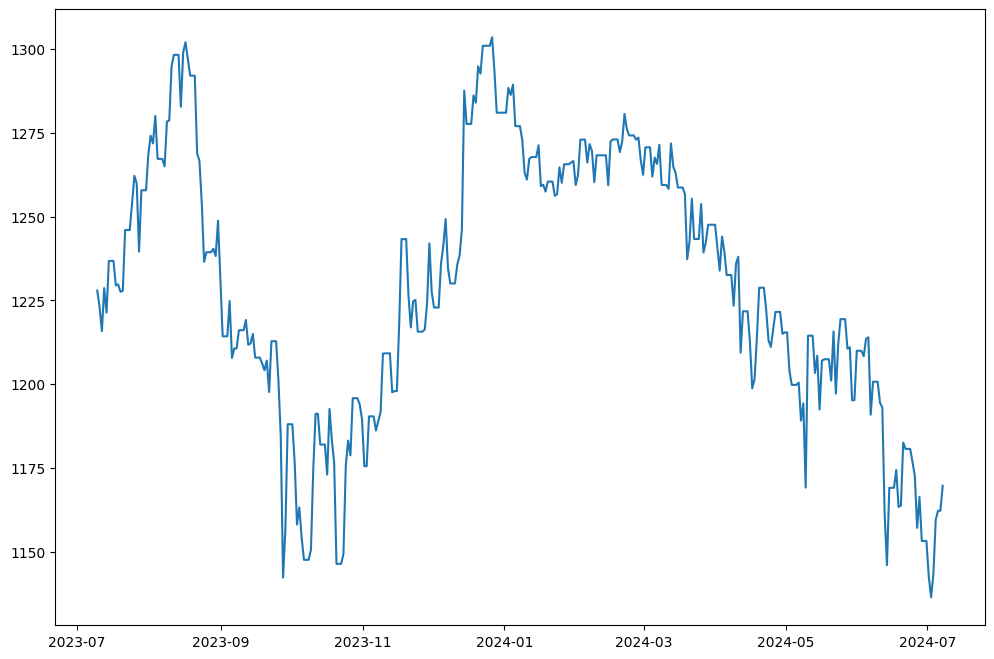

In [7]:
list_of_dates = [datetime.today() - timedelta(i) for i in range(365)]
values = [get_value("IPCA+ 2045",date=date) for date in list_of_dates]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(list_of_dates,values)

In [6]:


wedges, texts, autotexts = ax.pie(
    self.actual_position["Price per unit"]*self.actual_position["Amount"], 
    labels=self.actual_position["Ticker"], 
    colors=store_colors, 
    autopct=lambda pct: autopct_with_revenue(pct, self.actual_position["Total price"]), 
    startangle=90,
    pctdistance=0.9,
    wedgeprops=dict(width=width_chart_1, edgecolor='w'),
)

[datetime.datetime(2024, 7, 7, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 6, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 5, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 4, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 3, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 2, 16, 2, 21, 826210),
 datetime.datetime(2024, 7, 1, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 30, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 29, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 28, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 27, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 26, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 25, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 24, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 23, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 22, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 21, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 20, 16, 2, 21, 826210),
 datetime.datetime(2024, 6, 19, 16, 2, 21, 826210),
 datetime.datetime(

In [18]:
def update_last_download_time(last_download_path):
    with open(last_download_path, 'w') as file:
        file.write(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

def should_download(last_download_path, threshold_hours=24):
    if not os.path.exists(last_download_path):
        return True

    with open(last_download_path, 'r') as file:
        last_download_str = file.read().strip()
    last_download_time = datetime.strptime(last_download_str, '%Y-%m-%d %H:%M:%S')
    return (datetime.now() - last_download_time) > timedelta(hours=threshold_hours)


In [19]:
update_last_download_time(current_path/"last_update.txt")
should_download(current_path/"last_update.txt")

False

In [13]:
with open(current_path, 'wb') as file:
    file.write(current_path/"text.txt",datetime.year)

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\luizh\\Documentos\\visual_studio\\my_projects\\investiment_control'

In [6]:

csv_name = "investimentos_movimentacoes.csv"
raw_data = pd.read_csv(filepath_or_buffer=current_path/csv_name)
list_to_pop = ["Lucro","Imposto","Observação","F sup","Preço médio","Valor total"]
for name in list_to_pop:
    raw_data.pop(name)


data_base = pd.DataFrame()
data_base["owner"] = raw_data["Banco"].apply(lambda text: "Luiz" if text =="Inter" else "Luciane")
data_base["date"] = raw_data["Data operação"].apply(lambda date: datetime.strptime(date,"%d/%m/%Y"))
data_base["ticker"] = raw_data["Nome ativo"]
data_base["buy"] = raw_data["C/V"].apply(lambda text: True if text=="C" else False)
data_base["price"] = raw_data["Preço operação"].apply(lambda price_text: float(''.join(filter(lambda x: x.isdigit() or x in ',', price_text)).replace(",",".")))
data_base["amount"] = raw_data["Qnt"].apply(lambda Qnt: float(Qnt.replace(",",".")))
data_base["curency"] = "BRL"

In [7]:
portfolio_luiz = Portfolio(data_base[data_base["owner"]=="Luiz"].drop("owner",axis=1))
portfolio_luciane = Portfolio(data_base[data_base["owner"]=="Luciane"].drop("owner",axis=1))

In [4]:
get_value("Selic 2029")

14936.3

In [9]:
portfolio_luiz.data_base["date"]

1     2024-06-07
2     2024-06-07
9     2024-05-13
10    2024-05-13
14    2024-05-09
         ...    
389   2020-12-11
390   2020-12-04
391   2020-11-25
392   2020-11-18
393   2020-11-10
Name: date, Length: 151, dtype: datetime64[ns]

In [5]:
portfolio_luiz.compute_position()
portfolio_luciane.compute_position()

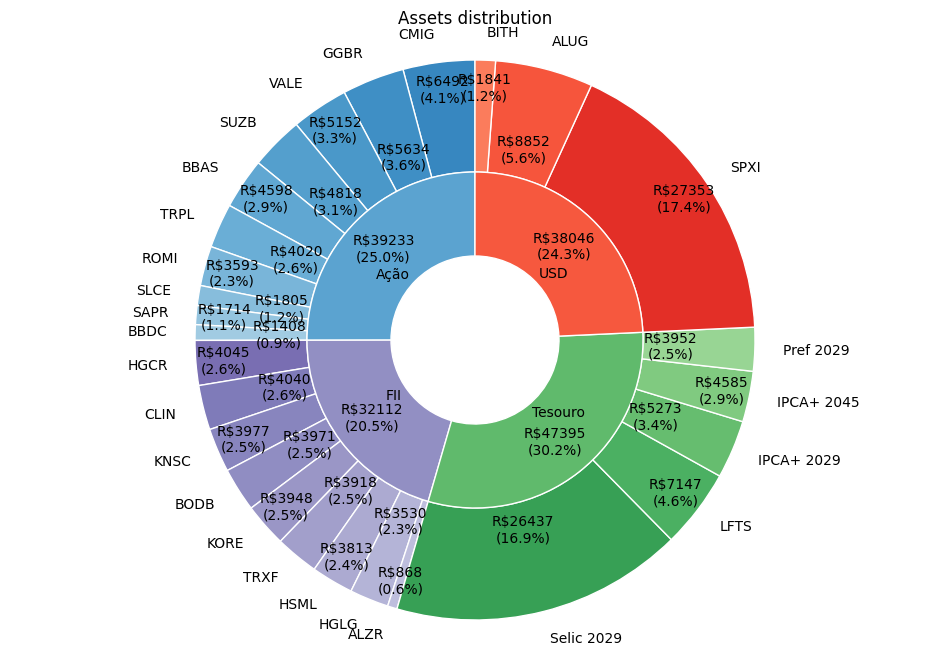

In [6]:
portfolio_luciane.plot_actual_postion()
# portfolio_luciane.rendidmentos(meses=12)

In [ ]:
datetime

In [ ]:
import tkinter as tk

def on_click():
    portfolio_luciane.plot_actual_postion()

app = tk.Tk()
app.title("Simple Tkinter App")

label = tk.Label(app, text="Hello, Tkinter!")
label.pack()

button = tk.Button(app, text="Click Me", command=on_click)
button.pack()

app.mainloop()

In [ ]:
portfolio_luciane.get_position("Selic 2026")

In [ ]:

self.data_base["class"] = [DICT_ASSET_INFO[ticker].asset_class for ticker in self.data_base["ticker"]]

mask_actual_position = [0 != self.get_position(ticker)[1] for ticker in self.data_base["ticker"].unique()]
mask_old_assets = [0 == self.get_position(ticker)[1] for ticker in self.data_base["ticker"].unique()]

actual_position = self.data_base["ticker"].unique()[mask_actual_position]
old_assets = self.data_base["ticker"].unique()[mask_old_assets]

self.actual_position = pd.DataFrame({
    "Ticker":[DICT_ASSET_INFO[ticker].name for ticker in actual_position],
    "Class":[DICT_ASSET_INFO[ticker].asset_class for ticker in actual_position],
    "Amount":[self.get_position(ticker)[1] for ticker in actual_position],
    "Cost per unit":[self.get_position(ticker)[0] for ticker in actual_position],
    "Price per unit":[get_value(ticker) for ticker in actual_position],
})
self.actual_position["Total cost"] = self.actual_position["Cost per unit"] * self.actual_position["Amount"]
self.actual_position["Total price"] = self.actual_position["Price per unit"] * self.actual_position["Amount"]

self.actual_position = self.actual_position.sort_values(by=["Class","Total price"],ascending=[True,False])

self.old_assets = pd.DataFrame({
    "Ticker":[DICT_ASSET_INFO[ticker].name for ticker in old_assets],
    "Class":[DICT_ASSET_INFO[ticker].asset_class for ticker in old_assets],
    "Amount":[self.get_position(ticker)[1] for ticker in old_assets],
    "Cost per unit":[self.get_position(ticker)[0] for ticker in old_assets],
    "Price per unit":[get_value(ticker) for ticker in old_assets],
})

self.old_assets = self.old_assets.sort_values("Class")

In [ ]:
def generate_colors(base_color, num_assets):
    cmap = plt.get_cmap(base_color)
    return [cmap((2*num_assets-i) / (3*num_assets)) for i in range(num_assets)]

def autopct_with_revenue(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return f"R${absolute}\n({pct:.1f}%)"

# Adjust the position of each percentage text
def change_label_radial_distance(list_distances,text_to_modify,wedges):
    for i, text in enumerate(text_to_modify):
        angle = (wedges[i].theta2 - wedges[i].theta1) / 2. + wedges[i].theta1
        x = list_distances[i%len(list_distances)] * np.cos(np.deg2rad(angle))
        y = list_distances[i%len(list_distances)] * np.sin(np.deg2rad(angle))
        text.set_position((x, y))

# Define color maps for each class
class_colors = {
    'USD': 'Reds',
    'Tesouro': 'Greens',
    'Ação': 'Blues',
    'FII': 'Purples'
}

unique_classes = portfolio_luciane.actual_position["Class"].unique()
class_store_counts = {cls: (portfolio_luciane.actual_position["Class"] == cls).sum() for cls in unique_classes}
class_colors_tones = {cls: generate_colors(class_colors[cls], count) for cls, count in class_store_counts.items()}

store_colors = []
class_color_index = {cls: 0 for cls in unique_classes}

for cls in portfolio_luciane.actual_position["Class"]:
    store_colors.append(class_colors_tones[cls][class_color_index[cls]])
    class_color_index[cls] += 1

fig, ax = plt.subplots(figsize=(12,8))
wedges, texts, autotexts = ax.pie(
    portfolio_luciane.actual_position["Price per unit"]*portfolio_luciane.actual_position["Amount"], 
    labels=portfolio_luciane.actual_position["Ticker"], 
    colors=store_colors, 
    autopct=lambda pct: autopct_with_revenue(pct, portfolio_luciane.actual_position["Total price"]), 
    startangle=90,
    pctdistance=0.9,
    wedgeprops=dict(width=0.4, edgecolor='w'),
)

# List of pctdistance values for individual control
pct_distances = [0.9,0.75]

change_label_radial_distance(pct_distances,autotexts,wedges)

wedges_2, texts_2, autotexts_2 = ax.pie(
    [
        portfolio_luciane.actual_position[portfolio_luciane.actual_position["Class"] == classe]["Total price"].sum() 
        for classe in unique_classes
    ],
    startangle=90,
    radius=1-0.4, 
    colors=[plt.get_cmap(class_colors[classe])(0.55) for classe in unique_classes],
    wedgeprops=dict(width=0.3, edgecolor='w'),
    autopct=lambda pct: autopct_with_revenue(pct, portfolio_luciane.actual_position["Total price"]),
    labels=unique_classes,
    pctdistance=0.77,
)

label_distance = 0.33
# Adjust the position of each percentage text
change_label_radial_distance([label_distance],texts_2,wedges_2)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Assets distribution')
plt.show()

In [ ]:
display(wedges[1].theta1)

In [ ]:
dict(width=size, edgecolor='w')

In [ ]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()